# Описание проекта

"Метанпромбанк" - один из лучших банков страны. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Product-manager обратился к нам для решения проблемы удержания клиентов банка.

**Цель исследования:** сокращение доли оттока клиентов банка и привлечение новых клиентов.

**Задачи исследования:** 

- проанализировать параметры клиентов банка;
- предложить/разработать вариант сегментации пользователей банковских услуг;
- определить долю оттока клиентов;
- предложить варианты сокращения доли оттока клиентов.

**Описание данных:**

Файл bank_dataset.csv содержит данные о клиентах банка "Метанпромбанк", а именно: 

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Получение (загрузка) данных

In [1]:
# импортируем необходимые для работы библиотеки

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

pd.set_option("precision", 2)

In [2]:
# создадим переменную и загрузим данные

df = pd.read_csv('')

In [3]:
# выводим общую информацию о датасете

display(df.columns, df.head(), df.describe())
print('*' * 50)
df.info()
print('*' * 50)
for column in ['City', 'Gender', 'Objects', 'Products', 'CreditCard', 'Loyalty', 'Churn']:
    print(df[column].unique())
    print('*' * 50)

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.00e+04,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,1.57e+07,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,7.19e+04,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,1.56e+07,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,1.57e+07,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,1.57e+07,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.0
75%,1.58e+07,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,1.59e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
**************************************************
['Ярославль' 'Рыбинск' 'Ростов Великий']
***************************

In [4]:
# проверка на наличие дубликатов

df.duplicated().sum()

0

In [5]:
# проверка на наличие неявных дубликатов

df['userid'].nunique()

10000

В результате ознакомления с данными, можно сделать следующие выводы:

- Названия столбцов оформлены со стилистическими ошибками (регистр);
- Все столбцы приведены к правильному типу данных;
- В данных присутствуют пропущенные значения (столбец Balance);
- С первого взгляда в данных отсутствуют нетипичные значения;
- В данных отсутствуют дубликты.

Произведем предобработку данных и подготовим датасет к анализу.

## Предобрадотка данных


Для начала избавимся от стилистических ошибок.

In [6]:
# приведем названия столбцов к единому регистру

df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Названия прописаны корректно, можем переходить к следующему этапу - пропуски.

Единственный столбец, в котором у нас имеются пропущенные значения - баланс на счёте. Проверим, с чем это может быть связано.

In [7]:
# выводим общее число пропущенных значений
balance_null = df[df['balance'].isnull()]

print('Пропусков до предобработки: ', balance_null['userid'].count(), \
      balance_null['userid'].count() / df['userid'].count() * 100 , '%')

# смотрим на средние значения показателей для строк с пропущенным балансом

balance_null.describe()

Пропусков до предобработки:  3617 36.17 %


,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,3.62e+03,3617.00,3617.00,3617.00,0.0,3617.00,3617.00,3617.00,3617.00,3617.00
mean,1.57e+07,649.45,38.43,5.07,NaN,1.78,0.72,0.52,98983.56,0.14
std,7.19e+04,96.16,10.49,2.86,NaN,0.50,0.45,0.50,57730.83,0.35
min,1.56e+07,350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,1.57e+07,583.00,31.00,3.00,NaN,1.00,0.00,0.00,49506.82,0.00
50%,1.57e+07,651.00,37.00,5.00,NaN,2.00,1.00,1.00,98618.79,0.00
75%,1.58e+07,717.00,43.00,7.00,NaN,2.00,1.00,1.00,148330.97,0.00
max,1.59e+07,850.00,88.00,10.00,NaN,4.00,1.00,1.00,199992.48,1.00


Объем пропущенных значений в столбце баланса довольно велик - 36% от общей массы. Избавится от пропусков через удаление мы не можем: это лишь приведет к искажению общих выводов и не даст нам достоверной информации по нашей проблеме.

Рассмотрим вариант с заполнением пропусков корректным значением. 

Ситуация, когда у клиента на остатке 0-00 у.е., вполне правдоподобна. Например, это может быть его зарплатный счет: каждый месяц на счет поступают денежные ср-ва, но клиент сразу переводит всю сумму в другой банк (по личным соображениям) - так счет работающий, движения идут, клиент уходить из банка не собирается, но на балансе будет 0-00 у.е.  Или же клиент мог открыть счет для определенной операции (скажем, аккредитив) и ждет зачисления денежных ср-в на этот счет: клиент активный, закрывать счет не планирует ,но на балансе пока что будет 0-00 у.е. Или же обратная ситуация: клиент уже подписал заявление на закрытие счетов, счета обнулил: тогда на балансе будет 0-00 у.е.

Исходя из полученных данных, нельзя однозначно сказать, связано ли отсутствие информации о балансе с уходом клиента (столбец churn оба значения на выборке) или же с его активностью (столбец loyalty также принимает оба значения), а быть может с некоторой технической ошибкой. Проверим данные.

In [8]:
# проверим, как распределены клиенты с незаполненным балансом по критериям

for col in balance_null.columns:
    display(balance_null.groupby(col)['userid'].count())

userid
15608442    1
15608542    1
15608614    1
15608615    1
15608627    1
           ..
15857779    1
15857833    1
15857972    1
15857995    1
15858100    1
Name: userid, Length: 3617, dtype: int64

score
350     2
373     1
376     1
382     1
405     1
       ..
845     2
846     3
847     1
849     2
850    78
Name: userid, Length: 434, dtype: int64

city
Рыбинск      1199
Ярославль    2418
Name: userid, dtype: int64

gender
Ж    1654
М    1963
Name: userid, dtype: int64

age
18     8
19    11
20    17
21    20
22    36
      ..
80     3
81     3
82     1
85     1
88     1
Name: userid, Length: 67, dtype: int64

objects
0     137
1     349
2     382
3     352
4     369
5     374
6     367
7     386
8     363
9     360
10    178
Name: userid, dtype: int64

Series([], Name: userid, dtype: int64)

products
1     905
2    2600
3      98
4      14
Name: userid, dtype: int64

creditcard
0    1025
1    2592
Name: userid, dtype: int64

loyalty
0    1744
1    1873
Name: userid, dtype: int64

estimated_salary
90.07        1
96.27        1
106.67       1
142.81       1
178.19       1
            ..
199657.46    1
199753.97    1
199775.67    1
199909.32    1
199992.48    1
Name: userid, Length: 3617, dtype: int64

churn
0    3117
1     500
Name: userid, dtype: int64

Можно заметить следующий парадокс: разбивка по количеству продуктов банка говорит нам о том, что более 70% пропусков в балансе приходятся на активных клиентов из Ярославля и Рыбинска с 2-мя продуктами, которые не планируют уходить из банка. Тогда подобное явление можно объяснить технической ошибкой:  скорее всего при выгрузке информации по остаткам на счетах программа не понимает, как действовать, если у клиента 2 счета и более (остаток по какому счету учитывать и как их суммировать). Отсюда и пропуски.

Заполнить пропущенные значения нулем в рамках нашего анализа было бы некорректно: такой вариант избавления от пропусков изменит средние показатели, а также может негативно сказаться на выделении сегментов.

Прежде чем производить замену, выведем распределение клиентов по балансу.

<AxesSubplot:>

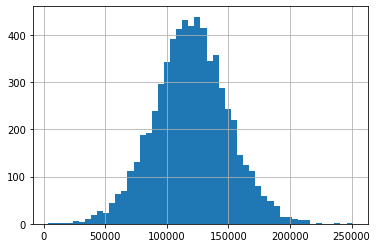

In [10]:
df.balance.hist(bins=50)

Заменим пропущенные значения на медианные.

In [11]:
# избавляемся от пропусков
df_new = df
for product in df_new['products'].unique():
    median = df_new.loc[df['products'] == product, 'balance'].median()
    df_new.loc[(df_new['balance'].isna()) & (df_new['products'] == product), 'balance'] = median
print('Пропусков после предобработки: ', df_new['balance'].isna().sum())

Пропусков после предобработки:  0


Проверим распределение клиентов после замены пропусков медианным значением.

<AxesSubplot:>

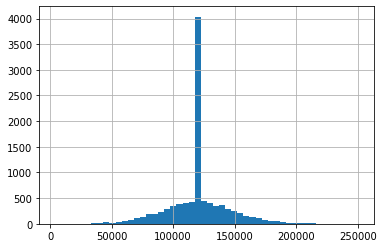

In [13]:
df_new.balance.hist(bins=50)

Распределение клиентов изменилось: медианное значение значительно превышает значения по всей выборке. Таким образом, замена пропусков на медианное значение баланса хоть и не меняет среднюю картину, однако сильно сказывается на распределении клиентов, тем самым искажая картину и препятствуя корректной сегментации клиентов.

Получается, что для целей нашего анализа ни удаление пропусков, ни заполнение каким-либо значением не подходят. Оставим пропуски в датасете, дабы не искажать картину.

Данные подготовлены. Проведем исследовательский анализ данных.

## Исследовательский анализ данных

Для того чтобы распределить всех клиентов по сегментам, необходимо обозначить точку, от которой будем отталкиваться. Рассмотрим общую информацию о пользователях банковских услуг, изучим распределения наших критериев, построим матрицу корреляции между критериями клиентов.

### Анализ средних значений параметров по всем клиентам

Для начала изучим средние значения в целом по всей выборке. Это позволит нам сделать усредненный портрет клиента банка, что крайне важно для планирования оттока и борьбы с данным явлением.

In [14]:
# изучим средние значения по числовым параметрам

display(df.describe())

# изучим средние значения по нечисловым параметрам

for col in ['city', 'gender']:
    display(df.groupby(col)['userid'].count())
    

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.00e+04,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,1.57e+07,650.53,38.92,5.01,119803.67,1.53,0.71,0.52,100090.24,0.2
std,7.19e+04,96.65,10.49,2.89,24044.03,0.58,0.46,0.50,57510.49,0.4
min,1.56e+07,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,1.57e+07,584.00,32.00,3.00,111581.13,1.00,0.00,0.00,51002.11,0.0
50%,1.57e+07,652.00,37.00,5.00,119762.24,1.00,1.00,1.00,100193.91,0.0
75%,1.58e+07,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,1.59e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


city
Ростов Великий    2509
Рыбинск           2477
Ярославль         5014
Name: userid, dtype: int64

gender
Ж    4543
М    5457
Name: userid, dtype: int64

Получаем усредненный портрет клиента "Метанпромбанк":

|Критерий ||
|:-----|:----:|
|Пол |Мужчина |
|Возраст |37-38 лет|
|Объектов в собственности |5 |
|Заработная плата |100 000 у.е. |
|Баланс | 119 000 у.е. |
|Отделение банка |Ярославль |
|Баллов кредитного скоринга |650 |
|Число используемых продуктов |1 |
|Кредитная карта |Да |
    
Определим, в чем различия между теми, кто ушел в отток и теми, кто остался.



### Анализ средних значений и распределения по критерию "клиент ушел / не ушел"


Рассмотрим различия в портретах отвалившихся клиентов и оставшихся.

Для удобства создадим функцию, которая бы выводила интересующие нас критерии.

In [15]:
def avg_means_per_mark(mark):
    
    # выводим средние значения по нечисловым параметрам

    for col in ['city', 'gender']:
        display(df.pivot_table(index = mark, columns = col, values = 'userid', aggfunc = 'count'))

    # выводим медианные значения по числовым параметрам
    print('Медианные значения')
    display(df.groupby(mark).median())
    print('Средние значения')
    display(df.groupby(mark).mean())

In [16]:
# выводим информацию в разбивке по ушедшим и оставшимся клиентам

avg_means_per_mark('churn')

city,Ростов Великий,Рыбинск,Ярославль
churn,,,
0,1695,2064,4204
1,814,413,810


gender,Ж,М
churn,,
0,3404,4559
1,1139,898


Медианные значения


,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,15734279,653,36,5,119762.24,2,1,1,99645.04
1,15731699,646,45,5,119919.12,1,1,0,102460.84


Средние значения


,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,,
0,1.57e+07,651.85,37.41,5.03,119628.22,1.54,0.71,0.55,99738.39
1,1.57e+07,645.35,44.84,4.93,120489.54,1.48,0.70,0.36,101465.68


Отобразим графически распределение клиентов по критерию. Это позволит нам заметить и выделить некоторые особенности в распределении клиентов.

Для удобства создадим функцию.

In [17]:
# создадим функцию для построения графиков

def feat_hist(x, group_col, key_cols):
    x_new = x.copy()[key_cols]
    for c in key_cols:
        if c == group_col:
            continue
        
        if len(x_new[c].unique()) < 10:
            report = x_new.reset_index().pivot_table(index = c, columns = group_col, values = 'index', aggfunc = 'count')
            report.plot(kind = 'bar', stacked = True, alpha = 0.5) 
        
        else:
            for cl in x[group_col].unique():
                sns.distplot(x_new[x_new[group_col] == cl][c], label = '{}={}'.format(group_col, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()

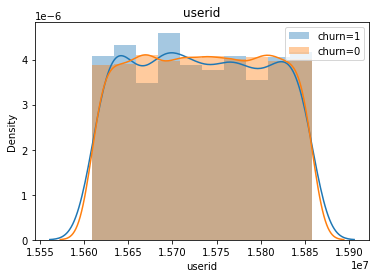

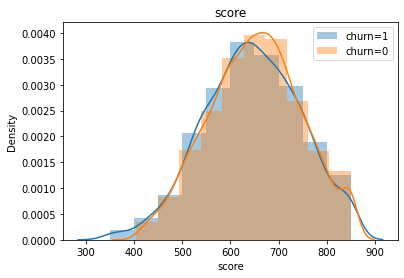

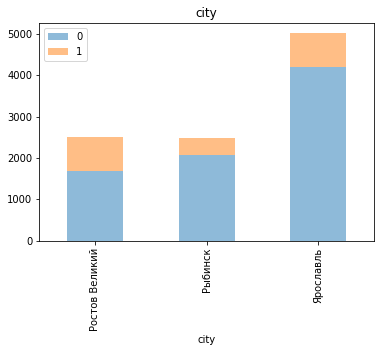

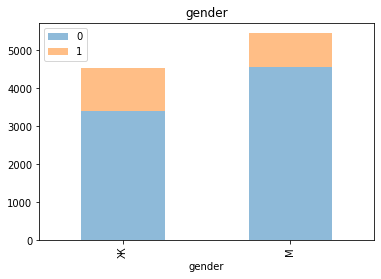

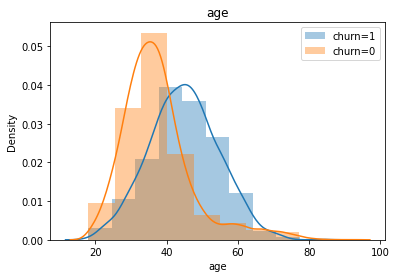

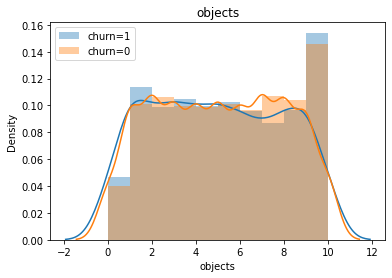

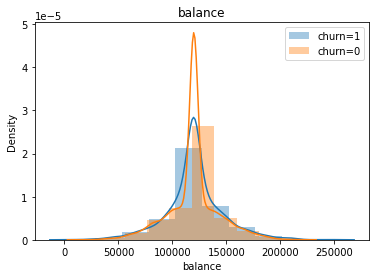

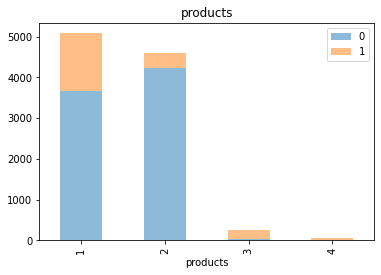

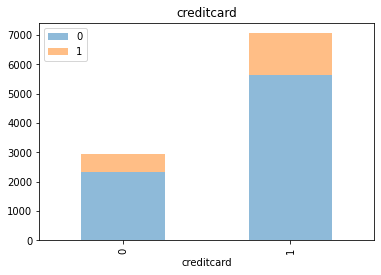

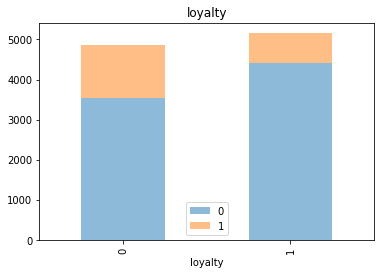

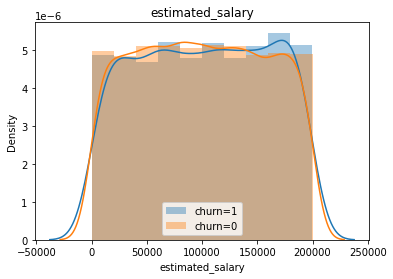

In [18]:
# строим графики

feat_hist(df, 'churn', df.columns)

Таким образом, получаем следующие портреты клиентов банка:

|Критерий |Остались|Ушли|
|:-----|:----:|----:|
|Пол |Мужчина |Женщина |
|Возраст |36-37 лет |44-45 лет |
|Объектов в собственности |5 |5 |
|Заработная плата |До 100 000 у.е. |Свыше 100 000 у.е. |
|Баланс | 119 000 у.е. | 120 000 у.е. |
|Отделение банка |Ярославль |Ростов Великий |
|Баллов кредитного скоринга |653 |646 |
|Число используемых продуктов |2 |1 |
|Кредитная карта |Да |Да |


Стоит отметить, что на показатель оттока оказывают влияние пол, возраст, географический фактор, а также число используемых продуктов. В зависимости от числа объектов в собственности, заработной платы, баланса, наличию кредитной карты значимых различий нет.

### Анализ средних значений и распределения по критерию "активный / пассивный клиент"


In [19]:
# выводим информацию в разбивке по активности клиента

avg_means_per_mark('loyalty')

city,Ростов Великий,Рыбинск,Ярославль
loyalty,,,
0,1261,1165,2423
1,1248,1312,2591


gender,Ж,М
loyalty,,
0,2259,2590
1,2284,2867


Медианные значения


,userid,score,age,objects,balance,products,creditcard,estimated_salary,churn
loyalty,,,,,,,,,
0,15733262,650,37,5,119762.24,1,1,100686.11,0
1,15733886,655,37,5,119762.24,2,1,99505.75,0


Средние значения


,userid,score,age,objects,balance,products,creditcard,estimated_salary,churn
loyalty,,,,,,,,,
0,1.57e+07,647.97,38.00,5.10,120208.12,1.52,0.71,100767.20,0.27
1,1.57e+07,652.93,39.79,4.93,119422.93,1.54,0.70,99452.97,0.14


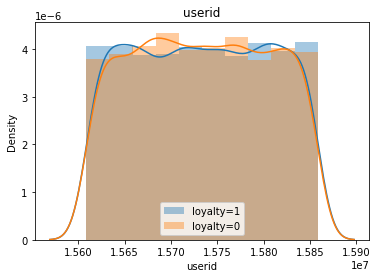

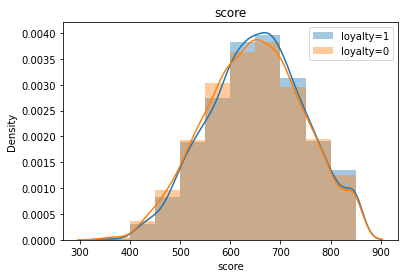

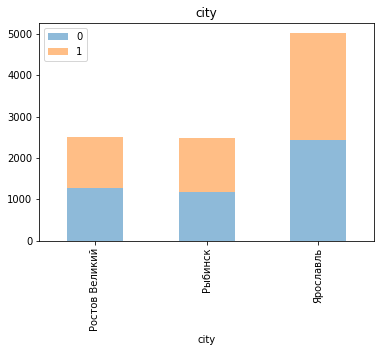

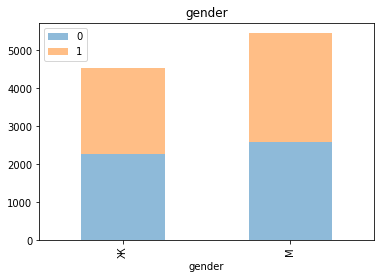

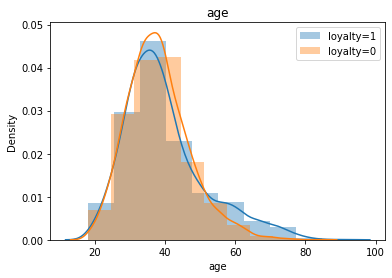

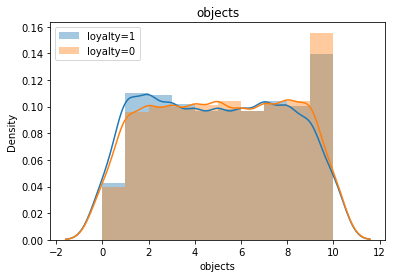

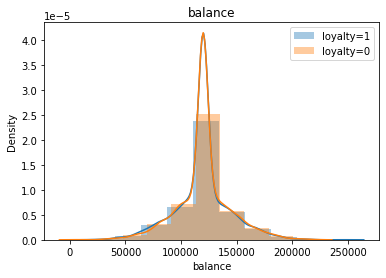

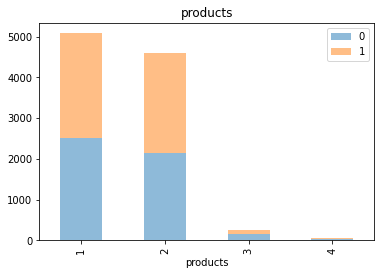

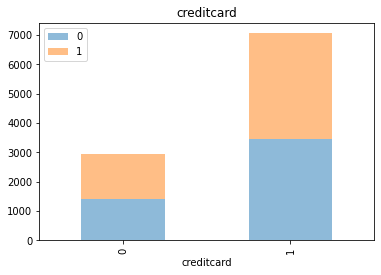

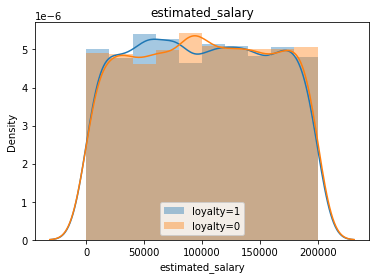

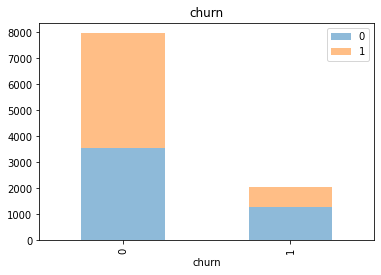

In [20]:
# строим графики

feat_hist(df, 'loyalty', df.columns)

Таким образом, получаем следующие портреты клиентов банка:

|Критерий |Пассивный|Активный|
|:-----|:----:|----:|
|Пол |Мужчина |Мужчина |
|Возраст |37 лет |37-39 лет |
|Объектов в собственности |5 |5 |
|Заработная плата |100 000 у.е. |100 000 у.е. |
|Баланс | 120 000 у.е. | 119 000 у.е. |
|Отделение банка |Ярославль |Ярославль |
|Баллов кредитного скоринга |650 |655 |
|Число используемых продуктов |1 |2 |
|Кредитная карта |Да |Да |

Получается, что на признак активности в большей мере влияет кол-во используемых продуктов банка. В зависимости от пола, позраста, объектов в собственности, величине заработной платы, географического фактора, наличию кредитной карты значимых отличий нет.

Также стоит отметить, что активные клиенты реже уходят из банка.

### Анализ средних значений и распределения по критерию "число используемых продуктов"


In [21]:
# выводим информацию в разбивке по числу продуктов банка

avg_means_per_mark('products')

city,Ростов Великий,Рыбинск,Ярославль
products,,,
1,1349,1221,2514
2,1040,1183,2367
3,96,66,104
4,24,7,29


gender,Ж,М
products,,
1,2296,2788
2,2060,2530
3,149,117
4,38,22


Медианные значения


,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,,
1,1.57e+07,651.0,38.0,5.0,119919.12,1.0,1.0,99226.83,0.0
2,1.57e+07,653.0,36.0,5.0,119762.24,1.0,1.0,100738.85,0.0
3,1.57e+07,650.0,42.0,5.0,118118.19,1.0,0.0,101046.89,1.0
4,1.57e+07,643.0,45.0,5.0,120968.27,1.0,0.0,112163.11,1.0


Средние значения


,userid,score,age,objects,balance,creditcard,loyalty,estimated_salary,churn
products,,,,,,,,,
1,1.57e+07,649.12,39.67,4.97,119898.61,0.70,0.50,99487.26,0.28
2,1.57e+07,652.19,37.75,5.05,119718.33,0.71,0.53,100452.01,0.08
3,1.57e+07,648.11,43.20,5.00,118975.56,0.71,0.42,104318.13,0.83
4,1.57e+07,653.58,45.68,5.30,121959.06,0.68,0.48,104763.72,1.00


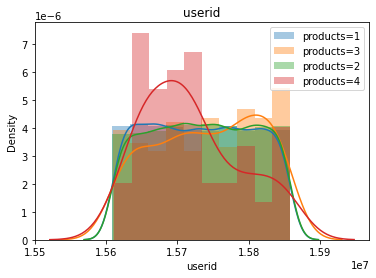

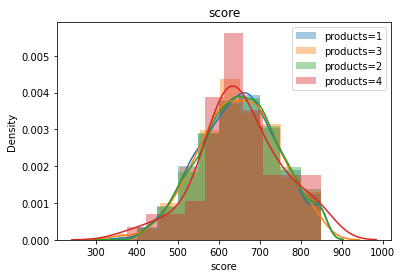

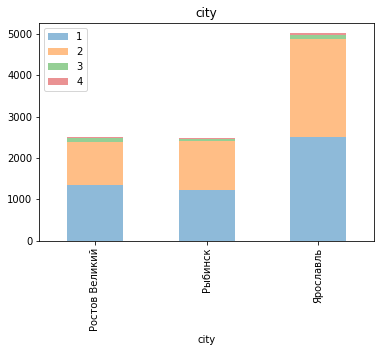

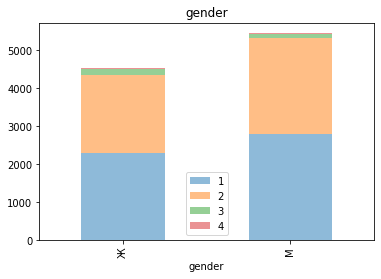

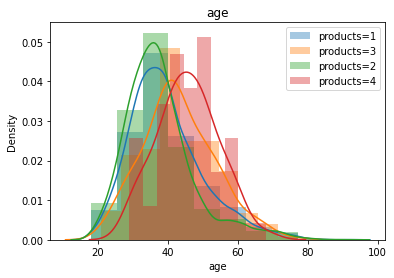

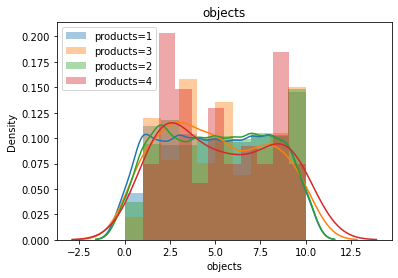

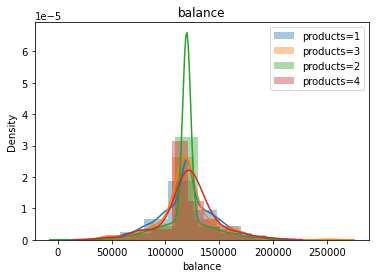

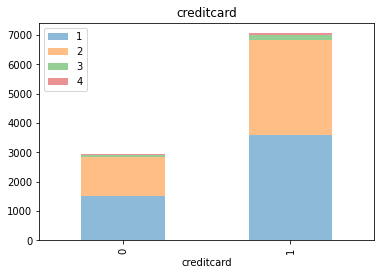

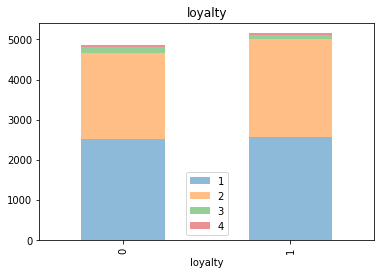

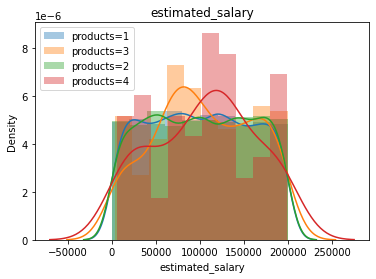

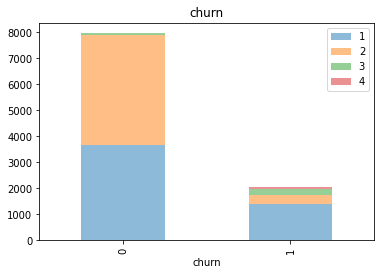

In [22]:
# строим графики

feat_hist(df, 'products', df.columns)

Получаем следующие портреты пользователей:

|Критерий |Используют 1 продукт|Используют 2 продукта|Используют 3 продукта|Используют 4 продукта|
|:-----|:----:|----:|----:|----:|
|Пол |Мужчина|Мужчина |Женщина |Женщина |
|Возраст |38-39 лет |36-37 лет |42-43 лет |45 лет |
|Объектов в собственности |5 |5 |5 |5 |
|Заработная плата |До 100 000 у.е. |100 000 у.е. |Свыше 100 000 у.е. |Свыше 100 000 у.е. |
|Баланс |119 000 у.е. |119 000 у.е. |118 000 у.е. |121 000 у.е. |
|Отделение банка |Ярославль |Ярославль |Ярославль |Ярославль |
|Баллов кредитного скоринга |651 |653 |650 |643 |
|Кредитная карта |Да |Да |Да |Да |


Стоит отметить, что на показатель числа продуктов оказывают влияние пол, возраст, а также размер заработной платы. В зависимости от числа объектов в собственности, географического фактора, баланса, наличию кредитной карты значимых различий нет.

Рассмотрим отдельно отток в разрезе используемых банковских продуктов.

churn,0,1
products,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


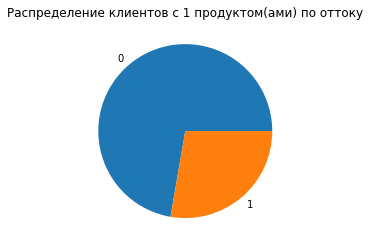

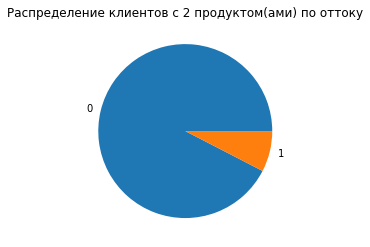

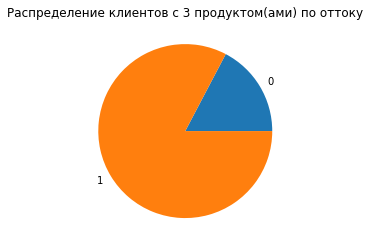

In [23]:
report = df.reset_index().pivot_table(index = 'products', columns = 'churn', values = 'index', aggfunc = 'count')
display (report)

for i in [1,2,3]:
    plt.pie(report.loc[i], labels=report.columns)
    plt.title(f'Распределение клиентов с {i} продуктом(ами) по оттоку')
    plt.show()


Наиболее подвержены оттоку клиенты с 3 и 4 продуктами: 

- более 80% клиентов с 3-мя продуктами покидают банк;
- 100% клиентов с 4 продуктами покидают банк.

Также в зону риска попадают клиенты с 1 продуктом: отток составляет 28%.

### Анализ взаимосвязи между параментрами (матрица корреляций)

Для определения степени влияния наших критериев на процесс выделения сегментов и, как следствие, на отток посетитетелей, построим матрицу корреляций. Она позволит понять, какие признаки станут ключевыми. 

Поскольку датасет содержит категориальные данные, перед построением матрицы корреляций преобразуем значение каждой категории в новый столбец и присвоим столбцу значение 1 или 0 (Истина / Ложь). Это дает преимущество в том, что значение не взвешивается неправильно.

Используя get_dummies, преобразуем данные.

In [24]:
# преобразуем значение каждой категории из списка в новый столбец 

df_dummies = pd.get_dummies(df, columns=["city", "gender"])

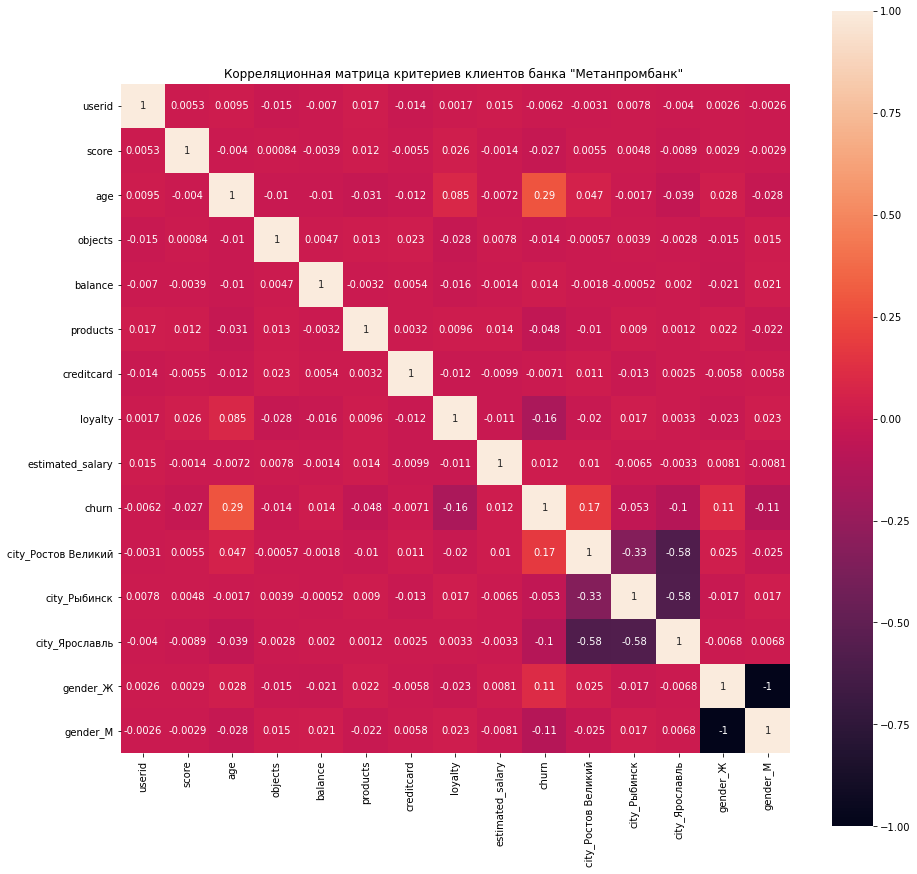

In [25]:
# строим матрицу

plt.figure(figsize=(15,15))
sns.heatmap(df_dummies.corr(), square = True, annot = True)
plt.title('Корреляционная матрица критериев клиентов банка "Метанпромбанк" ')
plt.show()

Оценивая степень взаимозависимости значений по критерию оттока, можно сказать, что в большей степени на этот показатель влияют пол, возраст и географический фактор (корреляция по данным параметрам выше). 

Используем наше наблюдение при оценке оттока по сегментам клиентов банка.

## Сегментация клиентов банка

Исходя из задач нашего анализа, проведем сегментацию всех пользователей на группы (сегменты) и оценим ключевые метрики в разбивке по сегментам.

### Выделение сегментов 

Для начала сегментируем всех клиентов по числу потребляемых продуктов.

#### Сегментация по количеству потребляемых продуктов банка 

In [26]:
# создадим функцию по отнесению клиентов к тому или иному сегменту по кол-ву продуктов

def product_group(value):
    
    """
    Возвращает продуктовую группу по значению столбца products, используя правила:
    - '1 продукт', если products = 1;
    - '2 продукта', если если products = 2;
    - 'более 3 продуктов' — если products = 3 или products = 4.
    """
    
    if value == 1:
        return '1 продукт'
    elif value == 2:
        return '2 продукта'
    else:
        return 'более 3 продуктов'

# применим функцию и сохраним результат в новый столбец

df['product_group'] = df['products'].apply(product_group)

df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,product_group
0,15677338,619,Ярославль,Ж,42,2,119919.12,1,1,1,101348.88,1,1 продукт
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1 продукт
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,более 3 продуктов
3,15744090,699,Ярославль,Ж,39,1,119762.24,2,0,0,93826.63,0,2 продукта
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1 продукт


Сегментация по числу продуктов прошла успешно. 

Однако для составления итогового портрета пользователей выделения сегмента по 1 признаку будет недостаточно. Дополним наш датасет половозрастным критерием.

#### Сегментация по половозрастной категории

In [27]:
# создадим функцию по отнесению клиентов к тому или иному сегменту по их полу и возрасту

def age_gender_group(row):
    
    """
    Возвращает половозрастную группу по значению возраста age и пола gender, используя правила:
    - 'молодой мужчина', если age < 30 лет и gender = М;
    - 'молодая женщина', если age < 30 лет и gender = Ж;
    - 'зрелый мужчина', если age от 30 до 65 и gender = М;
    - 'зрелая женщина', если age от 30 до 60 и gender = Ж;
    - 'пожилой мужчина', если age от 65 и gender = М;
    - 'пожилая женщина', если age от 60 и gender = Ж.
    """
    
    if row['age'] < 30 and row['gender'] == 'М':
        return 'молодой мужчина'
    elif row['age'] < 30 and row['gender'] == 'Ж':
        return 'молодая женщина'
    elif row['age'] >= 30 and row['age'] < 65 and row['gender'] == 'М':
        return 'зрелый мужчина'
    elif row['age'] >= 30 and row['age'] < 60 and row['gender'] == 'Ж':
        return 'зрелая женщина'
    elif row['age'] >= 65 and row['gender'] == 'М':
        return 'пожилой мужчина'
    elif row['age'] >= 60 and row['gender'] == 'Ж':
        return 'пожилая женщина'

# применим функцию и сохраним результат в новый столбец

df['age_gender_group'] = df.apply(age_gender_group, axis=1)

df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,product_group,age_gender_group
0,15677338,619,Ярославль,Ж,42,2,119919.12,1,1,1,101348.88,1,1 продукт,зрелая женщина
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1 продукт,зрелая женщина
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,более 3 продуктов,зрелая женщина
3,15744090,699,Ярославль,Ж,39,1,119762.24,2,0,0,93826.63,0,2 продукта,зрелая женщина
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1 продукт,зрелая женщина


Сегментация по половозрастному признаку прошла успешно. Можем приступать к описанию сегментов.

### Анализ средних значений и распределения клиентов по параметрам в разбивке по сегментам

In [28]:
# определяем средние значения для сегментов

for col in ['score', 'objects', 'balance', 'estimated_salary']:
    print(col)
    display(df.pivot_table(index = 'product_group', columns = 'age_gender_group', values = col, aggfunc = 'mean'))
    
for col in ['creditcard', 'loyalty', 'churn']:
    print(col)
    display(df.pivot_table(index = 'product_group', columns = 'age_gender_group', values = col, aggfunc = 'mean'))

score


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,650.08,648.03,653.60,646.90,635.13,674.22
2 продукта,652.31,650.91,647.66,657.19,674.94,648.19
более 3 продуктов,646.56,652.68,630.17,640.33,672.08,666.50


objects


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,4.95,4.97,4.99,5.03,4.94,5.35
2 продукта,4.94,5.11,5.15,5.21,4.82,4.54
более 3 продуктов,4.91,5.13,4.94,5.33,5.15,8.00


balance


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,119462.75,119862.35,118686.91,123849.28,119312.45,116353.13
2 продукта,119122.84,120122.03,119160.98,120229.61,119806.64,121251.74
более 3 продуктов,118980.78,119702.17,124199.42,120179.67,117207.60,120165.30


estimated_salary


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,101571.84,98429.29,97869.38,100603.31,92108.05,95674.96
2 продукта,99708.85,100098.05,101646.94,101937.11,105677.60,103809.53
более 3 продуктов,102625.18,105041.79,116432.48,102412.68,116721.32,63694.10


creditcard


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,0.70,0.70,0.69,0.74,0.71,0.72
2 продукта,0.71,0.70,0.68,0.73,0.72,0.72
более 3 продуктов,0.69,0.72,0.83,0.78,0.62,0.75


loyalty


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,0.47,0.50,0.54,0.52,0.68,0.87
2 продукта,0.51,0.54,0.49,0.50,0.89,0.93
более 3 продуктов,0.40,0.45,0.33,0.67,0.54,0.75


churn


age_gender_group,зрелая женщина,зрелый мужчина,молодая женщина,молодой мужчина,пожилая женщина,пожилой мужчина
product_group,,,,,,
1 продукт,0.36,0.26,0.14,0.08,0.41,0.16
2 продукта,0.12,0.06,0.04,0.02,0.16,0.06
более 3 продуктов,0.91,0.86,0.72,0.44,0.92,0.25


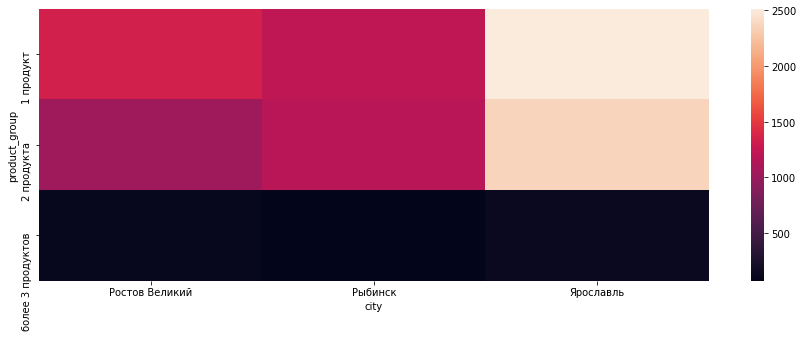

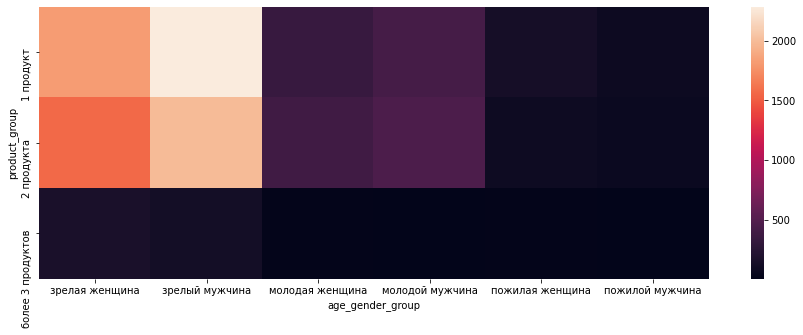

In [29]:
# выводим распределение клиентов по сегментам

for col in ['city','age_gender_group']:
    plt.figure(figsize=(15, 5)) 
    sns.heatmap(df.pivot_table(index = 'product_group', columns = col, values = 'userid', aggfunc = 'count'));


Получаем следующие портреты пользователей:

**- пользующиеся 1 продуктом:**

|Критерий |зрелая женщина|зрелый мужчина|молодая женщина|молодой мужчина|пожилая женщина|пожилой мужчина|
|:-----|:----:|----:|----:|----:|----:|----:|
|Пол |Женщина|Мужчина |Женщина |Мужчина |Женщина |Мужчина |
|Возраст |30-59 лет |30-64 лет |до 29 лет |до 29 лет |от 60 лет |от 65 лет |
|Объектов в собственности |5 |5 |5 |5 |5 |5 |
|Заработная плата |Свыше 100 000 у.е. |До 100 000 у.е. |До 100 000 у.е. |100 000 у.е. |До 100 000 у.е. |До 100 000 у.е. |
|Баланс |119 000 у.е. |119 000 у.е. |118 000 у.е. |123 000 у.е. |119 000 у.е. |116 000 у.е. |
|Баллов кредитного скоринга |650 |648 |653 |646 |635 |674 |
|Кредитная карта |Да |Да |Да |Да |Да |Да |
|Активный клиент |Нет |Да |Да |Да |Да |Да |



**- пользующиеся 2 продуктами:**

|Критерий |зрелая женщина|зрелый мужчина|молодая женщина|молодой мужчина|пожилая женщина|пожилой мужчина|
|:-----|:----:|----:|----:|----:|----:|----:|
|Пол |Женщина|Мужчина |Женщина |Мужчина |Женщина |Мужчина |
|Возраст |30-59 лет |30-64 лет |до 29 лет |до 29 лет |от 60 лет |от 65 лет |
|Объектов в собственности |5 |5 |5 |5 |5 |5 |
|Заработная плата |Свыше 100 000 у.е. |Свыше 100 000 у.е. |Свыше 100 000 у.е. |Свыше 100 000 у.е.|Свыше 100 000 у.е. |До 100 000 у.е. |
|Баланс |119 000 у.е. |120 000 у.е. |119 000 у.е. |120 000 у.е. |119 000 у.е. |121 000 у.е. |
|Баллов кредитного скоринга |652 |650 |647 |657 |674 |648 |
|Кредитная карта |Да |Да |Да |Да |Да |Да |
|Активный клиент |Да |Да |Нет |Да |Да |Да |




**- пользующиеся 3 и более продуктами:**

|Критерий |зрелая женщина|зрелый мужчина|молодая женщина|молодой мужчина|пожилая женщина|пожилой мужчина|
|:-----|:----:|----:|----:|----:|----:|----:|
|Пол |Женщина|Мужчина |Женщина |Мужчина |Женщина |Мужчина |
|Возраст |30-59 лет |30-64 лет |до 29 лет |до 29 лет |от 60 лет |от 65 лет |
|Объектов в собственности |5 |5 |5 |5 |5 |8 |
|Заработная плата |До 100 000 у.е. |100 000 у.е. |Свыше 100 000 у.е. |Свыше 100 000 у.е.|Свыше 100 000 у.е. |Свыше 100 000 у.е. |
|Баланс |118 000 у.е. |119 000 у.е. |124 000 у.е. |120 000 у.е. |117 000 у.е. |120 000 у.е. |
|Баллов кредитного скоринга |646 |652 |630 |640 |672 |666 |
|Кредитная карта |Да |Да |Да |Да |Да |Да |
|Активный клиент |Нет |Нет |Нет |Да |Да |Да |

Оценивая степень клиентской активности по сегментам, можно заметить:

- с возрастом активность клиентов возрастает;
- для пожилого сегмента клиентов характерна наибольшая степень активности;
- мужчины более активны чем женщины.

Проверим, есть ли различия по оттоку между сегментами.

### Рассчет и оценка доли оттока клиентов по сегментам

churn,0,1
product_group,,
1 продукт,3675,1409
2 продукта,4242,348
более 3 продуктов,46,280


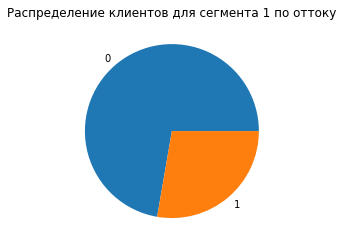

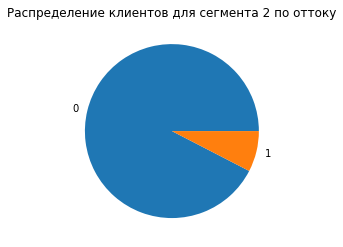

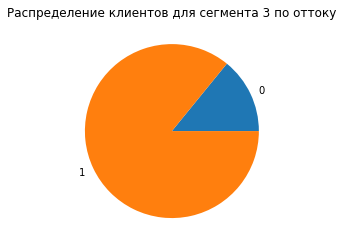

churn,0,1
age_gender_group,,
зрелая женщина,2569,983
зрелый мужчина,3582,830
молодая женщина,676,74
молодой мужчина,841,50
пожилая женщина,159,82
пожилой мужчина,136,18


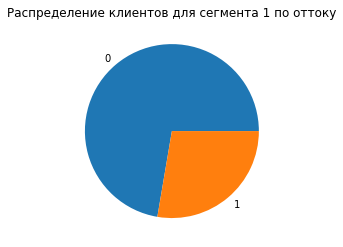

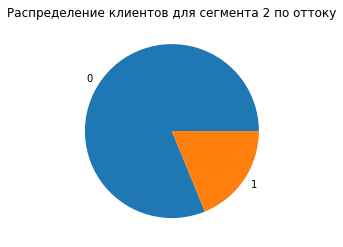

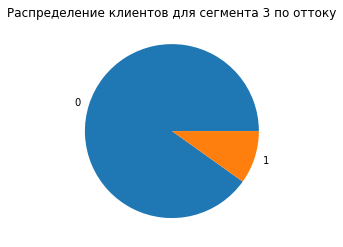

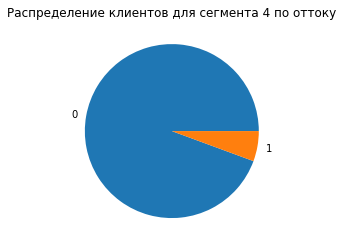

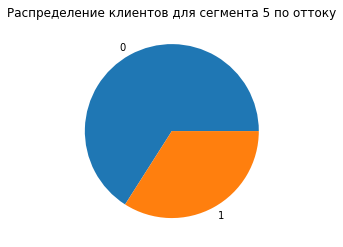

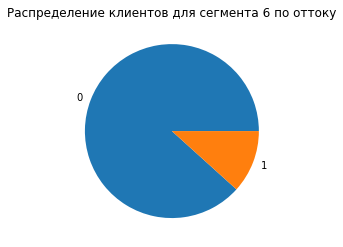

In [30]:
# определяем долю оттока для сегментов

for col in ['product_group', 'age_gender_group']:
    report = df.reset_index().pivot_table(index = col, columns = 'churn', values = 'index', aggfunc = 'count')
    display(report)
    for i in range(len(report)):
        plt.pie(report.iloc[i], labels=report.columns)
        plt.title(f'Распределение клиентов для сегмента {i+1} по оттоку')
        plt.show()


Наиболее многочисленными являются следующие сегменты:

    мужчины в возрасте 30-64 лет и женщины в возрасте 30-59 лет, пользующиеся 1 или 2 банковскими продуктами.


Оценивая отток по сегментам, получаем:

- для клиентов, пользующихся 1 продуктом, отток составляет 28%
- для клиентов, пользующихся 2 продуктами, отток составляет около 8%
- для клиентов, пользующихся 3-4 продуктами, отток составляет более 85%


- для сегмента "молодая женщина" отток составляет около 10%		
- для сегмента "молодой мужчина" отток составляет не более 6%	
- для сегмента "зрелая женщина" отток составляет 28%
- для сегмента "зрелый мужчина" отток составляет около 19%	
- для сегмента "пожилая женщина" отток составляет 34%	
- для сегмента "пожилой мужчина" отток составляет 12%

Получается, что женщины в возрасте старше 30 лет, а также мужчины в возрасте 30-64 лет, пользующиеся 1 либо 3 и более продуктами, сильнее подвержены оттоку, при чем женщины активнее уходят из банка.

## Проверка статистических гипотез

В рамках анализа необходимо проверить 2 гипотизы касательно критериев пользователей.

Проверку гипотез будем производить при помощи t-тестов, поскольку выборки для гипотез предсавляют собой независимые массивы данных.

Установим критический уровень статистической значимости в размере 5%.

In [31]:
alpha = .05

### Гипотеза о различии дохода между клиентами, пользующимися двумя и 1 продуктом

Предположим, что клиенты, пользующиеся 1 или 2 продуктами, в среднем имеют одинаковый доход. Так,

H0: средний доход клиента с 1 и клиента с 2 продуктами не различается

H1: средний доход клиента с 1 и клиента с 2 продуктами различается

In [40]:
one_product = df.query('product_group == "1 продукт" ') #формируем выборку 
print('Объем выборки для 1 продукта:', one_product['userid'].count())
two_products = df.query('product_group == "2 продукта" ')
print('Объем выборки для 2 продуктов:', two_products['userid'].count())
one_product = one_product['estimated_salary'] #формируем массив 
two_products = two_products['estimated_salary']

Объем выборки для 1 продукта: 5084
Объем выборки для 2 продуктов: 4590


Выборки достаточно велики, чтобы и по отдельности точно оценить дисперсию каждой генеральной совокупности. Установим equal_var = False и проверим гипотезу.

In [33]:
results = st.ttest_ind(one_product, two_products, equal_var = False) #используем метод для 2хнезависимых выборок
print('p-value:', results.pvalue) #выводим уровень значимости 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


По наблюдаемым данным нельзя отвергнуть предположение, что средний доход клиента с 1 и клиента с 2 продуктами не различается.


### Гипотеза о возрастном различии клиентов, пользующихся двумя и 1 продуктом

Предположим, что клиенты, пользующиеся 1 или 2 продуктами, в среднем относятся к одной возрастной категории. Так,

H0: средний возраст клиента с 1 и клиента с 2 продуктами не различается

H1: средний возраст клиента с 1 и клиента с 2 продуктами различается

In [34]:
one_product = df.query('product_group == "1 продукт" ') #формируем выборку 
two_products = df.query('product_group == "2 продукта" ')
one_product = one_product['age'] #формируем массив 
two_products = two_products['age']

In [35]:
results = st.ttest_ind(one_product, two_products) #используем метод для 2хнезависимых выборок
print('p-value:', results.pvalue) #выводим уровень значимости 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.730821607368763e-19
Отвергаем нулевую гипотезу


По наблюдаемым данным можно предположить, что средний возраст клиента с 1 и клиента с 2 продуктами различается.

## Выводы и рекомендации



Таким образом, был проведен анализ клиентов регионального банка «Метанпромбанк», располагающегося в Ярославле и областных городах: Ростов Великий и Рыбинск.

Проанализировав критерии пользователей, были определены и построены типовые портреты клиентов банка.

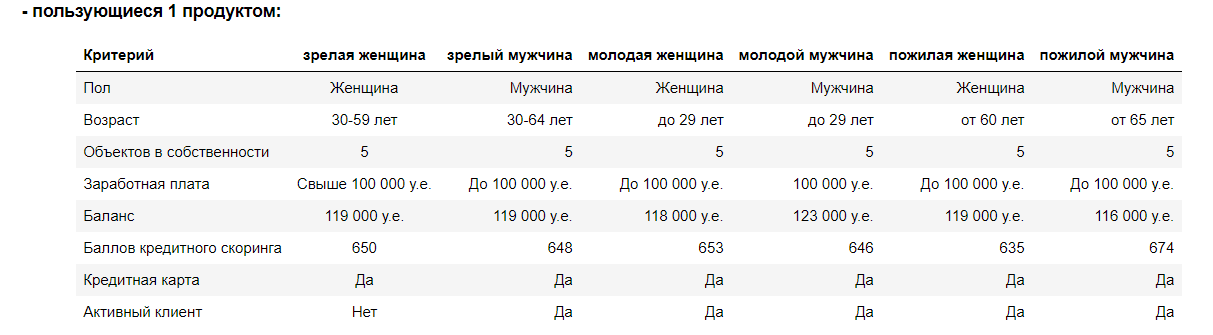

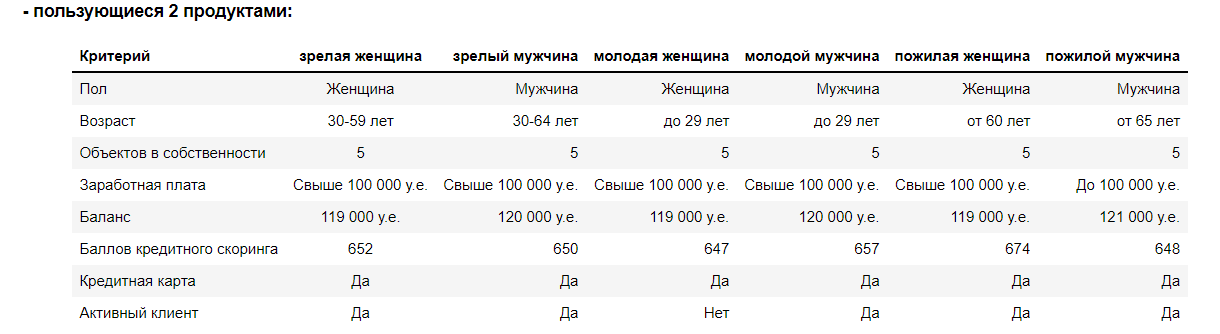

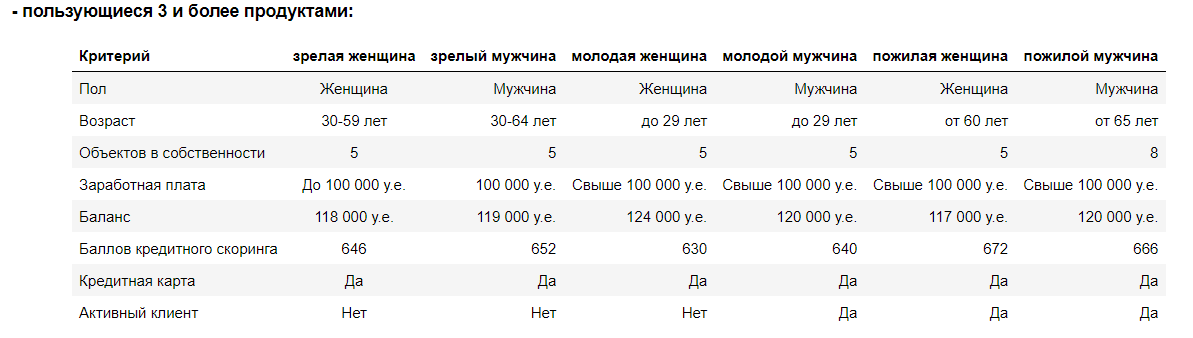

Наиболее многочисленными являются следующие сегменты:

    мужчины в возрасте 30-64 лет и женщины в возрасте 30-59 лет, пользующиеся 1 или 2 банковскими продуктами.
    

Оценивая степень клиентской активности по сегментам, можно заметить:

- с возрастом активность клиентов возрастает;
- для пожилого сегмента клиентов характерна наибольшая степень активности;
- мужчины более активны чем женщины.


Оценивая отток по сегментам, получаем:

- для клиентов, пользующихся 1 продуктом, отток составляет 28%
- для клиентов, пользующихся 2 продуктами, отток составляет около 8%
- для клиентов, пользующихся 3-4 продуктами, отток составляет более 85%


- для сегмента "молодая женщина" отток составляет около 10%		
- для сегмента "молодой мужчина" отток составляет не более 6%	
- для сегмента "зрелая женщина" отток составляет 28%
- для сегмента "зрелый мужчина" отток составляет около 19%	
- для сегмента "пожилая женщина" отток составляет 34%	
- для сегмента "пожилой мужчина" отток составляет 12%

Получается, что женщины в возрасте старше 30 лет, а также мужчины в возрасте 30-64 лет, пользующиеся 1 либо 3 и более продуктами, сильнее подвержены оттоку, при чем женщины активнее уходят из банка.

В зависимости от территориального критерия, величина оттока также меняется: наибольший отток фиксируется в Ростове Великом (32%), отток в Ярославке и Рыбинске держится на отметке в 16%.

**Рекомендации для бизнеса:**

Абсолютно все группы клиентов пользуются кредитными картами. Возможно именно благодаря хорошим предложениям в этом сегменте и были привлечены клиенты. Но на данный момент много клиентов ими не пользуется. Рационально провести анализ конкуретной среды, понять что предлагают конкуренты. Вероятно, что клиенты пользуются кредитными картами от других банков, а карты исследуемого банка держат т.к. еще актуален срок действия карты. В случае, если гипотеза подтвердится, то нужно актуализировать предложения по кредитным картам. 

Наиболее активная часть клиентов пользуется двумя продуктами банка. Необходимо понять какими конкретно продуктами они пользуются. Возможно это зарплатные клиенты, у которых есть и дебетовые, и кредитные клиенты. Для повышения вовлечения клиентов, пользующихся только одним продуктом, стоит подготовить персонализированные предложения по дебетовым или кредитным картам. 

Однако в первую очередь необходимо разобраться с теми сегментами, где отток выше всего.

- Сегмент "3 и более продуктов"

Несмотря на немногочисленность данного сегмента, отток здесь составляет более 85%. Возможный вариант решения проблемы оттока: предложение данным клиентам услуг на уровень выше. За счет небольшого числа клиентов данной категории, можно рассмотреть более дорогие для банка продукты, например, бесплатный перевыпуск карт на карты премиального уровня (Gold, Platinum) или же год VIP обслуживания в подарок, если клиент будет поддерживать ежемесячные обороты на счете не менее 105 000 у.е., например.

- Сегмент "зрелая женщина"

Наибольший процент оттока приходится на пассивных клиентов-женщин. Основной акцент необходимо сделать на них. Учитывая уровень заработка, а также кредитный рейтинг, можно развить программу льготного кредитования с участием мат. капитала. Помимо этого, популярностью будут пользоваться кредитные/дебетовые карты, эмитированные совместно с крупными сетевыми магазинами (например, Lamoda или Rendez Vous). Возможна подготовка индивидуальных предложений для многодетных женщин (напрмер, система кэшбека с покупок в детских магазинах).

- Сегмент "пожилая женщина"

Для сокращения оттока в данном сегменте можно предложить особые условия по привлечению денежных ср-в, например, более высокие ставки по вкладам, отдельные инвестиционные продукты. Учитывая кол-во объектов в собственности и остатки по счетам, также можно развить линейку страховых продуктов, бесплатное оформление завещаний или бесплатные консультации юристов по правовым вопросам (но не более ограниченного числа раз в месяц, например, 1-2 раза).
